# Curse of Dimensionality


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rc('figure', figsize = (7, 5))

In [2]:
def average_distance(n_features, n_samples=100):
    """ Calculate the mean distance of two vectors randomly chosen
    
    Vectors to generate are within the same unit hypercube, namely each element of vector
    is in range of [0, 1].
    
    Parameters
    ----------
    n_features : int
        The dimension of vector space
    n_samples : int (optional)
        The number of samples to generate ramdomly
    
    Returns
    -------
    average : float
        The mean l2 norm of randomly generated two vectors
    """
    A = np.random.rand(n_samples, n_features)
    B = np.random.rand(n_samples, n_features)
    return np.mean(np.linalg.norm(A - B, axis=1))

In [3]:
print('square (2d):', average_distance(2))
print('cube   (3d):', average_distance(3))
print('1,000,000d :', average_distance(1000000))

square (2d): 0.531899888716326
cube   (3d): 0.6537463043317742
1,000,000d : 408.26826641354876


* データ空間の次元が非常に大きいと、ランダムに選ばれた二点間の距離が非常に離れることがわかる
    * つまり、スパースな状態になりやすい
* 解決策として、次元数に十分なほどデータを用意することが考えられるが、次元数の指数関数のデータ数が必要になることがわかっているので非現実的
* そこで現実的なアプローチとして、**次元削減 (dimensionality reduction)**を行う

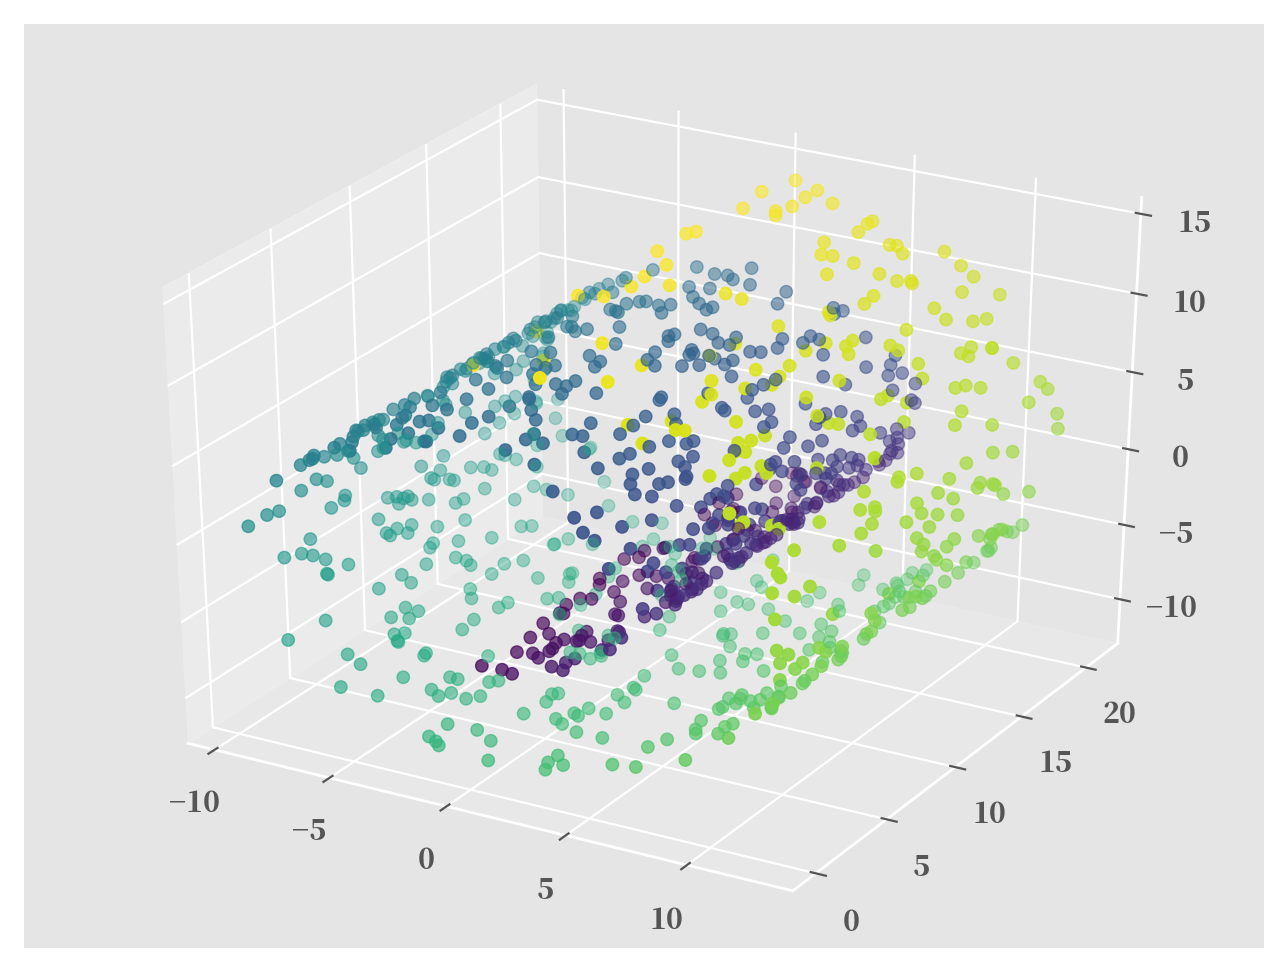

In [10]:
from sklearn.datasets.samples_generator import make_swiss_roll

SAMPLE_SIZE = 1000
X, y = make_swiss_roll(SAMPLE_SIZE, 0.05)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

In [12]:
from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(X)
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# n_components = np.argmax(cumsum >= 0.95) + 1

# n_components に [0,1] の値を指定すると自動的に上記のような処理を行う
pca = PCA(n_components=0.95)
X_recduced = pca.fit_transform(X)
X_recduced.shape

(1000, 3)

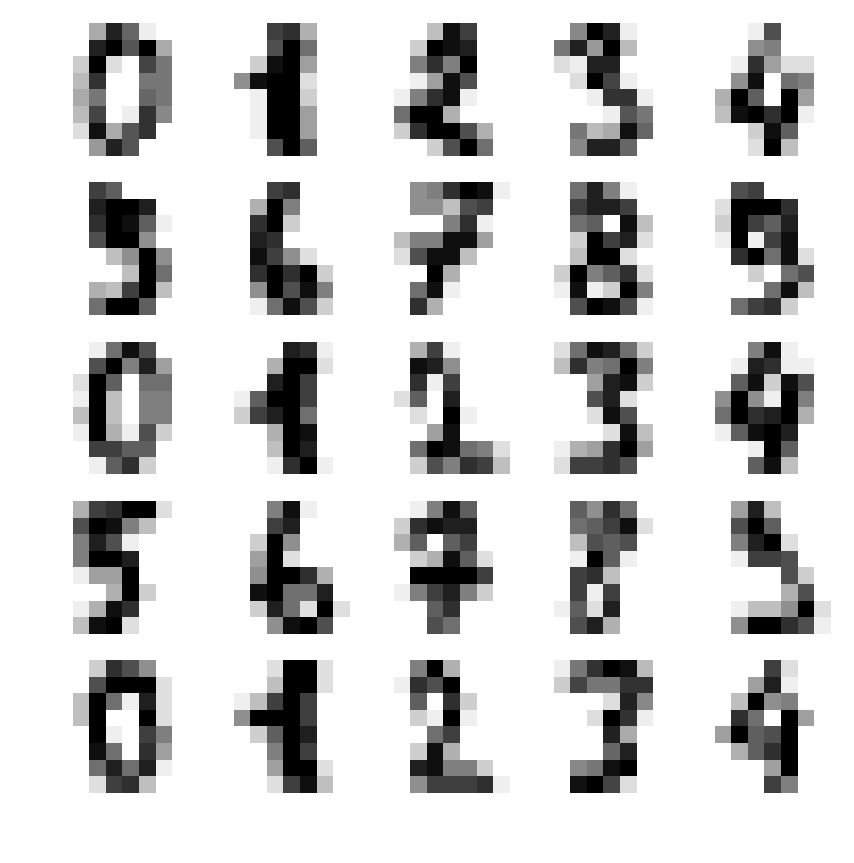

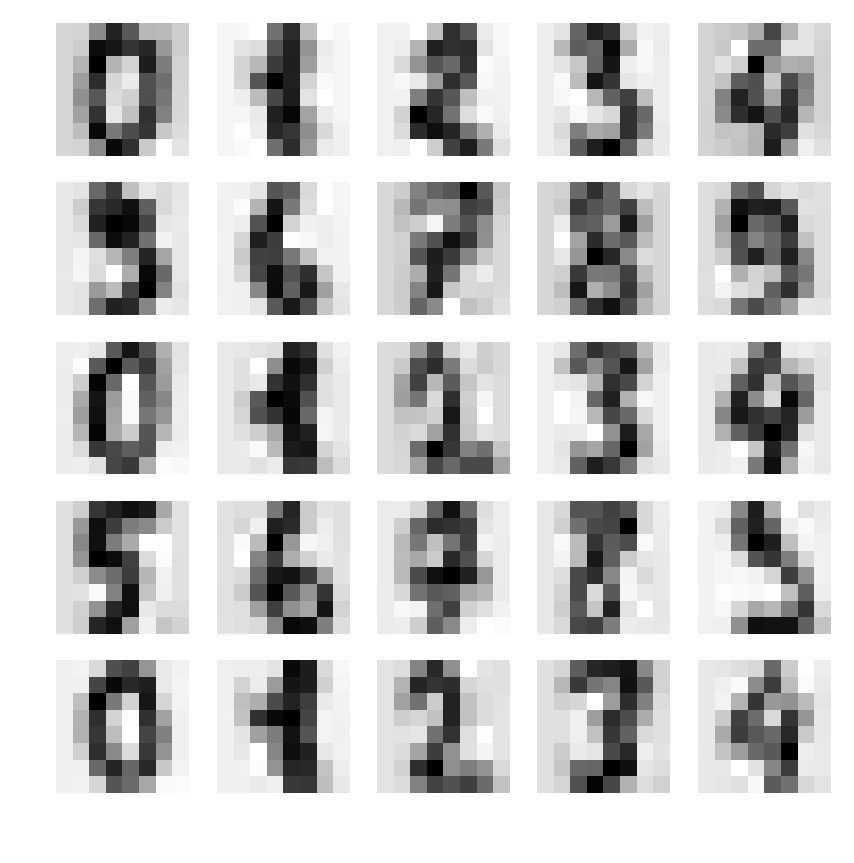

In [34]:
from sklearn.datasets import load_digits

mnist = load_digits()
X_mnist = mnist.data

pca = PCA(n_components=0.9)
X_mnist_reduced = pca.fit_transform(X_mnist)
X_mnist_reconstructed = pca.inverse_transform(X_mnist_reduced)

def plot_mnist(X, indices, image_width=8):
    size = int(np.sqrt(len(indices)) + 0.5)
    fig, axes = plt.subplots(size, size, figsize=(5,5))
    plt.axis('off')
    axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx].reshape(image_width, image_width), cmap='gray_r')
        axes[i].axis('off')

plot_mnist(X_mnist, np.arange(25))
plot_mnist(X_mnist_reconstructed, np.arange(25))

In [37]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=10)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)
    
pca = PCA(n_components=10)
pca.fit(X_mnist)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)